<a href="https://colab.research.google.com/github/laukikupadhye/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [86]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df=pd.read_csv(db)

# Explore data

In [87]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [88]:
#- ADD CODE HERE (1)
df.nunique()
#df.groupby('county').nunique()['state']


date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [89]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
#- ADD CODE HERE (2)
Bristol_fips=int (df[(df['county']=='Bristol')& (df['state']=='Massachusetts')]['fips'].unique())
Suffolk_fips=int (df[(df['county']=='Suffolk')& (df['state']=='Massachusetts')]['fips'].unique())
print('Bristol_fips=',Bristol_fips)
print('Suffolk_fips=',Suffolk_fips)

Bristol_fips= 25005
Suffolk_fips= 25025


In [90]:
#df[['date','county','state','cases','deaths']][df['fips']==25005]
#get_county_stat(df,Bristol_fips).head()

In [91]:
#ADD CODE HERE - (3)
def get_county_stat(df,fips):
  return df[['date','county','state','cases','deaths']][(df['fips']==fips)].set_index('date')
get_county_stat(df,Bristol_fips).head(10)
#bris=get_county_stat(df,Bristol_fips).head(10)

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0
2020-03-19,Bristol,Massachusetts,6,0
2020-03-20,Bristol,Massachusetts,6,0
2020-03-21,Bristol,Massachusetts,14,0
2020-03-22,Bristol,Massachusetts,24,0


In [11]:
#bris
#bris.groupby('county').nunique()

## Explore data type

In [94]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)
print(df_Bristol)
print(df_Suffolk)

             county          state  cases  deaths
date                                             
2020-03-14  Bristol  Massachusetts      1       0
2020-03-15  Bristol  Massachusetts      1       0
2020-03-16  Bristol  Massachusetts      2       0
2020-03-17  Bristol  Massachusetts      5       0
2020-03-18  Bristol  Massachusetts      5       0
...             ...            ...    ...     ...
2020-09-06  Bristol  Massachusetts   9365     664
2020-09-07  Bristol  Massachusetts   9393     667
2020-09-08  Bristol  Massachusetts   9409     668
2020-09-09  Bristol  Massachusetts   9418     668
2020-09-10  Bristol  Massachusetts   9448     670

[181 rows x 4 columns]
             county          state  cases  deaths
date                                             
2020-02-01  Suffolk  Massachusetts      1       0
2020-02-02  Suffolk  Massachusetts      1       0
2020-02-03  Suffolk  Massachusetts      1       0
2020-02-04  Suffolk  Massachusetts      1       0
2020-02-05  Suffolk  Massa

Text(0, 0.5, 'Counts')

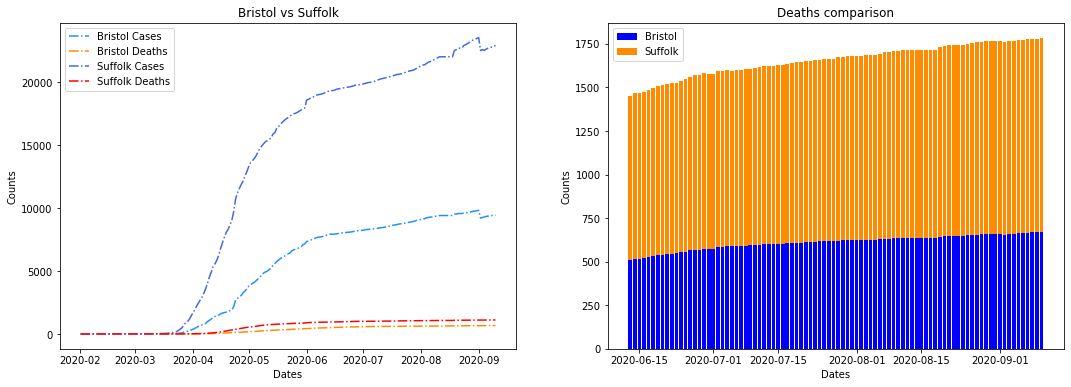

In [95]:
import datetime as dt
import matplotlib.dates as mdate
f,ax = plt.subplots(1,2,figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(pd.to_datetime(df_Bristol.index.values),df_Bristol['cases'].values,'-.',label='Bristol Cases',color='dodgerblue')
plt.plot(pd.to_datetime(df_Bristol.index.values),df_Bristol['deaths'].values,'-.',label='Bristol Deaths', color='darkorange')
plt.plot(pd.to_datetime(df_Suffolk.index.values),df_Suffolk['cases'].values,'-.',label='Suffolk Cases',color='royalblue')
plt.plot(pd.to_datetime(df_Suffolk.index.values),df_Suffolk['deaths'].values,'-.',label='Suffolk Deaths',color='red')
plt.legend(loc=2)
#f.autofmt_xdate()
plt.title('Bristol vs Suffolk')
plt.xlabel('Dates')
plt.ylabel('Counts')
#plt.gcf().autofmt_xdate()
#ax=plt.gca()
#ax.fmt_xdata=mdate.DateFormatter('%Y-%m-%d')
#ax.xaxis.set_major_locator(mdate.MonthLocator())
plt.legend(loc=2)

plt.subplot(1,2,2)
plt.bar(pd.to_datetime(df_Bristol.index.values[-90:]),df_Bristol.deaths[-90:],label='Bristol',color='blue')
plt.bar(pd.to_datetime(df_Suffolk.index.values[-90:]),df_Suffolk.deaths[-90:],label='Suffolk',bottom=df_Bristol.deaths[-90:],color='darkorange')
plt.legend(loc=2)
plt.title('Deaths comparison')
plt.xlabel('Dates')
plt.ylabel('Counts')




###Data sorting and rolling for remaining tasks

In [96]:
#data cleaning for further tasks
df.sort_values(['date','fips'])
df['dailycases']=df.groupby('fips')['cases'].diff().fillna(0)
df['dailycases']=df['dailycases'].rolling(window=3).max()

df['dailydeaths']=df.groupby('fips')['deaths'].diff().fillna(0)
df['dailydeaths']=df['dailydeaths'].rolling(window=3).max()

## Top 10 counties by number of cases and deaths 



In [97]:
#print(df)
processed=df
processed=df.groupby(['fips','county'],as_index=False).sum()
#print(topdata)
topdata=processed[['county','dailycases','dailydeaths']].sort_values(['dailycases','dailydeaths'],ascending=False).head(10)
topdata

,county,dailycases,dailydeaths
201,Los Angeles,251024.0,6129.0
203,Marin,251023.0,6128.0
202,Madera,251011.0,6128.0
358,Miami-Dade,162893.0,2803.0
360,Nassau,162892.0,2790.0
359,Monroe,162792.0,2791.0
100,Maricopa,136571.0,3143.0
102,Navajo,136563.0,3157.0
101,Mohave,136320.0,3148.0
605,Cook,132976.0,5104.0


## Death rate Per FIPS 

In [98]:
processed['deathRate']=processed['dailydeaths']/processed['dailycases']*100
#deathrate=processed[['fips','deathRate']].sort_values(['deathRate'],ascending=False).head(10)
print(processed[['fips','deathRate']])

         fips  deathRate
0      1001.0   2.007528
1      1003.0   1.351616
2      1005.0   1.410658
3      1007.0   1.118568
4      1009.0   1.366607
...       ...        ...
3200  72151.0   0.000000
3201  72153.0   0.000000
3202  78010.0   1.757812
3203  78020.0   1.716738
3204  78030.0   1.704545

[3205 rows x 2 columns]


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [99]:
import folium


In [100]:
def plotmap(data,legend):
  county_geo = 'https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json'
  m = folium.Map(location=[37, -102], zoom_start=4.5)
  data['fips']=data['fips'].astype(int)
  data['fips']=data['fips'].astype(str)

  folium.Choropleth(
  geo_data=state_geo,
  name='choropleth',
  data=data,
  columns=['fips', 'values'],
  key_on='feature.id',
  fill_color='YlGn',
  fill_opacity=0.7,
  line_opacity=0.2,
  legend_name=legend
  ).add_to(m)
  folium.LayerControl().add_to(m)
  return m

def folium_choropleth(type,date):
  lastDate=pd.to_datetime(date)
  firstDate=lastDate-pd.to_timedelta(7,unit='D')
  df['date']=pd.to_datetime(df['date'])
  datalim=df[(df['date']>=firstDate)&(df['date']<=lastDate)]
  #return datalim
  if type=='cases':
    df1=datalim[['fips','dailycases']]
    df1=df1.rename(columns={'dailycases':'values'})
    df1=df1.groupby('fips',as_index=False).sum()
    return plotmap(df1,'Weekly cases')
  elif type=='deaths':
    df1=datalim[['fips','dailydeaths']]
    df1=df1.rename(columns={'dailydeaths':'values'})
    df1=df1.groupby('fips',as_index=False).sum()
    return plotmap(df1,'Weekly Deaths')
  else:
#    print(datalim)
    #print(datalim.groupby(['date','fips']).sum())
    datalim.loc[datalim['date']!=lastDate,'cases']=0
    df1=datalim.groupby(['date','fips'],as_index=False).sum()
    df1['values']=(df1['deaths']*100)/df1['cases']
    df1=df1[['fips','values']]
    return plotmap(df1,'Weekly Mortality Rate')
#    df1=datalim[['fips','dailycases','dailydeaths']].groupby('fips',as_index=False).sum()
#   df1['values']=df1['dailycases']



In [102]:
folium_choropleth('cases','2020-06-15')

         fips  values
0      1001.0   102.0
1      1003.0   102.0
2      1005.0   102.0
3      1007.0    63.0
4      1009.0    54.0
...       ...     ...
3080  72151.0    11.0
3081  72153.0    16.0
3082  78010.0     4.0
3083  78020.0     2.0
3084  78030.0     2.0

[3085 rows x 2 columns]


In [ ]:
folium_choropleth('deaths','2020-06-15')

In [ ]:
folium_choropleth('mortality','2020-06-15')